<a href="https://colab.research.google.com/github/jarminett/Statistical_Learning_II/blob/main/XOR/XOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UNIVERSIDAD GALILEO** \\
Instituto de Investigación de Operaciones \\
Posgrado en Análisis y Predicción de Datos \\
Luis Florian, 0710082, sección U \\

**XOR con composición y perceptrones**

Terminar el ejercicio empezado en clase: Xor a través de composición manual de perceptrones.

Nota: vectorizar código (resolver a través de operaciones vectorizadas)

### **Libraries**

In [59]:
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

### **Red Neural**

In [51]:
# Reutilizacion de code del ejercicio anterior.
class XOR:
    def __init__(self):
        self.w1 = np.array([
            [20, -20],
            [20, -20],
            [-10, 30]
        ])
        self.w2  = np.array([20, 20, -30])
        self.H = None  
    
    def hiddenLayer(self):
        return self.H
        
    def __sigmoid(self,X):
        return 1/(1+np.exp(-X))

   
    
    def forwardPropagation(self,X):
        X = np.c_[ X, np.ones(X.shape[0]) ]  
        self.H = self.__sigmoid(np.matmul(X,self.w1))
        H_bias = np.c_[ self.H, np.ones(self.H.shape[0]) ] 
        yhat = self.__sigmoid(np.matmul(H_bias,self.w2))
        return yhat.reshape(-1,1)

In [45]:
#Todas las combinaciones binarias de dos features.
x1 = np.array([0,0,1,1]).reshape(-1,1)
x2 =  np.array([0,1,0,1]).reshape(-1,1)
x = np.hstack((x1,x2))

### **Cálculo de XOR**

In [54]:
RN_xor = XOR()
y = np.around(RN_xor.forwardPropagation(x).reshape(-1,1))
#pd.DataFrame(np.hstack((x,y), columns = ["x1", "x2", "y"] ))
valores = np.hstack((x,y))
c = ["x1", "x2", "XOR"]

cuadro = pd.DataFrame(valores, columns=c)
cuadro

,x1,x2,XOR
0,0.0,0.0,0.0
1,0.0,1.0,1.0
2,1.0,0.0,1.0
3,1.0,1.0,0.0


### **Matriz Resultante**

In [55]:
matriz = RN_xor.hiddenLayer()
pd.DataFrame(matriz, columns = ["h1", "h2"] )

,h1,h2
0,0.000045,1.000000
1,0.999955,0.999955
2,0.999955,0.999955
3,1.000000,0.000045


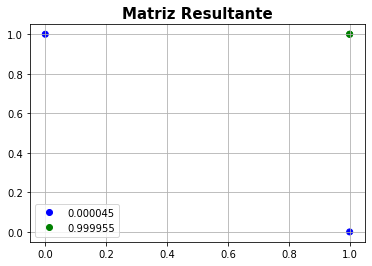

In [65]:
font = {'family': 'DejaVu Sans',
        'color':  'black',
        'weight': 'bold',
        'size': 15,
        }

colours = ListedColormap(['blue','green'])
classes = ["0.000045","0.999955"]

plot = plt.scatter(matriz[:,0],matriz[:, 1], c=y.reshape(1,-1)[0].tolist(),cmap=colours)

plt.title("Matriz Resultante",fontdict=font)
plt.legend(handles=plot.legend_elements()[0],labels=classes)
plt.grid(True)
plt.show()